In [555]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
from statistics import multimode 
from datetime import datetime

# 0. Lectura y tratamiento de la base de datos

In [556]:
P_T_diarias_BCN = pd.read_csv(r"C:\Users\ronch\Desktop\Programación\ITAcademy\Proyecto\Precip_Temp_diarias_BCN.csv")
P_T_diarias_BCN.head()

,ANY,MES,DIA,PPT,TX,TN,INS
0,1950,1,1,0.0,13.1,7.1,-99.9
1,1950,1,2,0.0,12.0,3.9,-99.9
2,1950,1,3,0.0,15.5,6.8,-99.9
3,1950,1,4,0.0,14.6,9.5,-99.9
4,1950,1,5,0.0,14.2,6.5,-99.9


In [557]:
P_T_diarias_BCN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANY     27028 non-null  int64  
 1   MES     27028 non-null  int64  
 2   DIA     27028 non-null  int64  
 3   PPT     27028 non-null  float64
 4   TX      27028 non-null  float64
 5   TN      27028 non-null  float64
 6   INS     27028 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [558]:
P_T_diarias_BCN.describe()

,ANY,MES,DIA,PPT,TX,TN,INS
count,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000
mean,1986.499667,6.523013,15.729392,1.680468,19.257311,11.777864,-18.880957
std,21.360010,3.448744,8.800151,6.597736,6.568095,5.764453,46.056607
min,1950.000000,1.000000,1.000000,0.000000,-1.200000,-9.600000,-99.900000
25%,1968.000000,4.000000,8.000000,0.000000,14.000000,7.300000,0.000000
50%,1986.500000,7.000000,16.000000,0.000000,18.700000,11.300000,5.900000
75%,2005.000000,10.000000,23.000000,0.000000,24.600000,16.600000,9.400000
max,2023.000000,12.000000,31.000000,194.800000,39.100000,29.600000,14.200000


In [559]:
P_T_diarias_BCN = pd.DataFrame(P_T_diarias_BCN)
P_T_diarias_BCN.columns

Index(['ANY', 'MES', 'DIA', 'PPT', 'TX', 'TN', 'INS'], dtype='object')

In [560]:
# Necesito crear una columna con la fecha completa y para esto los siguientes pasos: 

# Calculo el número total de filas al que quiero asignar la fecha
num_filas = len(P_T_diarias_BCN)

# Genero una secuencia de fechas desde '1950-01-01', para un periodo igual al de mi número de filas
# y con una frecuencia de días 
fechas = pd.date_range(start='1950-01-01', periods=num_filas, freq='D')

# Asigno la secuencia de fechas a la columna 'fecha'
P_T_diarias_BCN['fecha'] = fechas

# Verifico los resultados
print(P_T_diarias_BCN[['ANY', 'MES', 'DIA', 'fecha']].tail())



        ANY  MES  DIA      fecha
27023  2023   12   27 2023-12-27
27024  2023   12   28 2023-12-28
27025  2023   12   29 2023-12-29
27026  2023   12   30 2023-12-30
27027  2023   12   31 2023-12-31


In [561]:
# cambio los valores de -99.99 de INS por Nan
P_T_diarias_BCN['INS'] = P_T_diarias_BCN['INS'].where(P_T_diarias_BCN['INS'] != -99.9, np.nan)

P_T_diarias_BCN.head()
#P_T_diarias_BCN.tail(10)


,ANY,MES,DIA,PPT,TX,TN,INS,fecha
0,1950,1,1,0.0,13.1,7.1,NaN,1950-01-01
1,1950,1,2,0.0,12.0,3.9,NaN,1950-01-02
2,1950,1,3,0.0,15.5,6.8,NaN,1950-01-03
3,1950,1,4,0.0,14.6,9.5,NaN,1950-01-04
4,1950,1,5,0.0,14.2,6.5,NaN,1950-01-05


# 1. Evolución de las precipitaciones anuales a largo plazo
### ¿Ha disminuido la precipitación total anual a lo largo del tiempo en la región estudiada?

Primero realizo una visualización de las precipitaciones diarias para tener una idea de como van variando a lo largo del tiempo. 

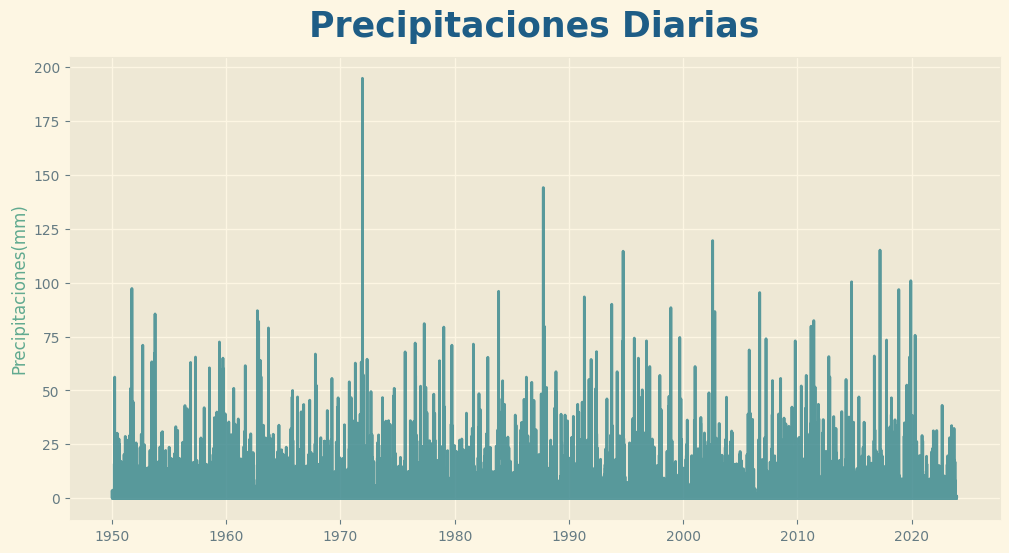

In [562]:
plt.style.use('Solarize_Light2')
fig, ax1 = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("crest", n_colors=3)

# Grafico las precipitaciones diarias

ax1.plot(P_T_diarias_BCN['fecha'],
         P_T_diarias_BCN['PPT'],
         color= colors[1], 
        alpha=0.8, 
        label='Precipitaciones')
ax1.set_title('Precipitaciones Diarias', fontsize=25, color=colors[2], pad=15, fontweight='bold')
ax1.set_ylabel('Precipitaciones(mm)', color=colors[0])

plt.show()

Para conseguir una idea más clara o una visualización más clara de como evoluciona el total de precipitación al año. Agrupo las precipitaciones diarias por años y las sumo, para obtener el total anual y graficar esto. 

In [563]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
prec_anual_BCN = P_T_diarias_BCN.groupby('ANY')['PPT'].sum().sort_values(ascending=False).reset_index()
prec_anual_BCN = prec_anual_BCN.rename(columns= {"PPT": "PPT_anual"} )
prec_anual_BCN[prec_anual_BCN['ANY'] == 1995]


,ANY,PPT_anual
53,1995,504.1


In [564]:
prec_anual_BCN['PPT_anual'].describe()

count      74.000000
mean      613.779730
std       175.369759
min       307.700000
25%       490.875000
50%       579.000000
75%       712.625000
max      1122.700000
Name: PPT_anual, dtype: float64

### 1.1 Descripción de la variable: PRECIPITACIÓN (mm)

Para empezar voy a analizar el tipo de variable elegida antes de decidir que análisis estadístico sería el más apropiado para esta variable. 

Para el proyecto he decidido trabajar con la variable del **precipitaciones**. Es una variable numérica de tipo **CONTINUO**, puesto que puede tomar cualquier valor entre 0 e infinito. En este caso estoy tratando datos de precipitaciones en mm ( 1 litro de agua por m2 de superficie). Además, al observar la media, mediana y moda de la variable **precipitación**, podemos ver que no coinciden. La media (613.78), la mediana(579.00) y la moda (513) están bastante alejadas. Es una prueba de que estoy ante una serie de datos que no presentan una distribución normal. 

Para realizar una última comprobación, utilizo el **Shapiro Test** que es un test destinado a comprobar la normalidad de la distribución para muestras de datos pequeñas y medianas. Obtengo un valor *p_value* mucho menos que 0.05 (0.000376), y un valor de *stat* relativamente cerca a 1 (0.92), por tanto, aunque el estadístico *stat* no es bajo y sugiere que los datos podrían ser relativamente cercanos a una distribución normal, el valor p tan pequeño indica una evidencia en contra de la normalidad fuerte. En conclusión, me encuentro ante una muestra de datos que NO se distribuyen normalmente. 


In [565]:
# Calculo las medidas de estadística  descriptivas generales
prec_stats = round(prec_anual_BCN['PPT_anual'].describe(), 2)

# Añado algunas medidas más: Mediana, Moda, Rango, Varianza
prec_median = round(prec_anual_BCN['PPT_anual'].median(), 2)
prec_range = np.ptp(prec_anual_BCN['PPT_anual'])
prec_mode = prec_anual_BCN['PPT_anual'].mode()[0]  
prec_varianza = round(np.var(prec_anual_BCN['PPT_anual'], ddof=1), 2)
prec_mean = prec_anual_BCN['PPT_anual'].mean()  

# añado las nuevas medidas a la lista de estadística descriptiva
prec_stats['median'] = prec_median
prec_stats['mode'] = prec_mode 
prec_stats['range'] = prec_range
prec_stats['varianza'] = prec_varianza

prec_stats

count          74.00
mean          613.78
std           175.37
min           307.70
25%           490.88
50%           579.00
75%           712.62
max          1122.70
median        579.00
mode          513.90
range         815.00
varianza    30754.55
Name: PPT_anual, dtype: float64

In [566]:

# compruebo si la distribución es normal haciendo el Shapiro TEST
# stat es el valor para evaluar la normalidad de la muestra

from scipy.stats import shapiro
stat, p_value = shapiro(prec_anual_BCN['PPT_anual'])

if p_value > 0.05:
    print(f"La distribución es aproximadamente normal: p_value = {p_value:2f}")
else:
    print(f"La distribución no es normal: p_value = {p_value:2f}")
    
print(stat)

La distribución no es normal: p_value = 0.000376
0.9272110317443841


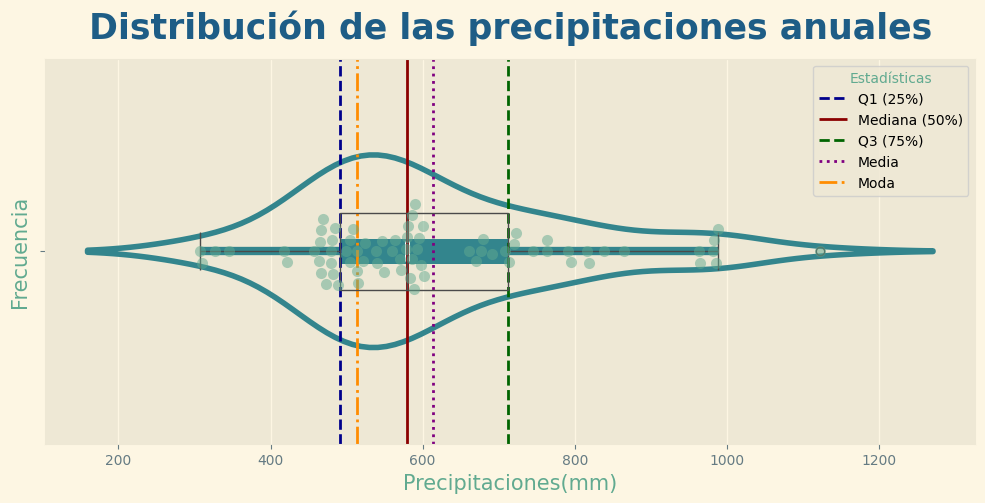

In [567]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,5))
colors = sns.color_palette("crest", n_colors=3)

# creo el gráfico violín con seaborn
violin = sns.violinplot(x=prec_anual_BCN['PPT_anual'], 
               linewidth= 4, 
               width= 0.5,
               color=colors[1],
               orient='h', # para establecer una orientación horizontal
               fill=False,
               density_norm='count'  # para la normalización de los datos
            )

# Grafico unas líneas con las medidas descriptivas más importantes 
ax.axvline(x=prec_stats['25%'], color="darkblue", linestyle="--", linewidth=2, label="Q1 (25%)")
ax.axvline(x=prec_median, color="darkred", linestyle="-", linewidth=2, label="Mediana (50%)")
ax.axvline(x=prec_stats['75%'], color="darkgreen", linestyle="--", linewidth=2, label="Q3 (75%)")
ax.axvline(x=prec_mean, color="purple", linestyle=":", linewidth=2, label="Media")
ax.axvline(x=prec_mode, color="darkorange", linestyle="-.", linewidth=2, label="Moda")

# incluyo dentro del gráfico violín la representación del gráfico de caja para observar los valores reales
caja = sns.boxplot(x=prec_anual_BCN['PPT_anual'], 
                   width=0.2,
                   boxprops={'facecolor':'None'}) # para no poner relleno en la caja


# Añado una representación de enjambre para poder observar los datos reales sobre los que estoy trabajando.
ax = sns.swarmplot(x=prec_anual_BCN['PPT_anual'], 
                   color=colors[0], 
                   edgecolor=colors[0],
                   alpha = 0.5, # transparencia de los puntos
                   s=8, # tamaño de los círculos
             )
# establezco el título y los nombres de los ejes
ax.set_title("Distribución de las precipitaciones anuales", fontsize= 25,color=colors[2], pad=15, fontweight='bold')
ax.set_xlabel("Precipitaciones(mm)", fontsize= 15,color=colors[0])
ax.set_ylabel("Frecuencia", fontsize= 15 ,color=colors[0])
legend= ax.legend(title="Estadísticas", fontsize=10)
plt.setp(legend.get_title(), color=colors[0])
plt.show()

### 1.2 ¿La precipitación total anual está aumentando, disminuyendo o permaneciendo constante a lo largo de los años?

Por otro lado quiero calcular si hay una disminución, aumento o se mantiene constante la precipitación anual, para esto calculo una regresión lineal de los datos, con la función de scipy.stats **linregress()** 
Esta función me calcula los parámetros que definen la recta que visualiza la tendencia: 
- la pendiente de la recta (slope): cómo tengo una pendiente negativa **-1.08 mm/año** esto me indica que hay una disminución de la precipitación en el tiempo pero muy suave.
- el punto de intercepción en el eje y, para el valor de x = 0. (intercept)
Además me calcula 
- Coeficiente de correlación R2 (r_value): mide la fuerza y la dirección de la relación lineal entre las variables.Un valor de -1 indica una relación negativa perfecta. (R2 = **-0.13** ) indica una ligera relación negativa entre los años y las precipitaciones, pero muy débil porque el valor está más cerca a 0 que a -1.
- Valor p (p_value): **0.262** muestra la significancia de la relación. Si el valor p es menor que un umbral (generalmente 0.05), podemos decir que la pendiente es significativamente diferente de cero, lo que implica una relación significativa entre el año y las precipitaciones. En este caso el p_value es mucho mayor que 0.05 por lo tanto, la tendencia no es estadísticamente representativa. 


In [568]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(
    prec_anual_BCN['ANY'], 
    prec_anual_BCN['PPT_anual'])

# Muestro los resultados del calculo de linregress
print(f'Tendencia anual: {slope:.2f} mm/año')
print(f'Intercepto: {intercept:.2f}')
print(f'Coeficiente de correlación: {r_value:.2f}')
print(f'Valor p: {p_value:.3f}')
print(f'Error estándar: {std_err:.2f}')

# Determino si la tendencia es significativa
if p_value < 0.05:
    print("La tendencia es estadísticamente significativa.")
else:
    print("La tendencia NO es estadísticamente significativa.")



Tendencia anual: -1.08 mm/año
Intercepto: 2752.85
Coeficiente de correlación: -0.13
Valor p: 0.262
Error estándar: 0.95
La tendencia NO es estadísticamente significativa.


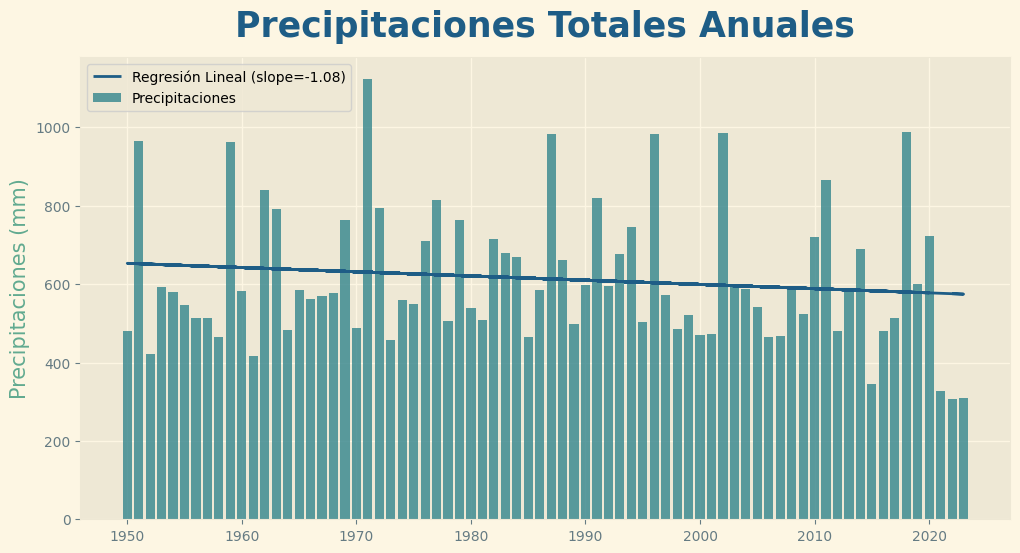

In [569]:
plt.style.use('Solarize_Light2')
fig, ax1 = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("crest", n_colors=3)

# Grafico las precipitaciones anuales
ax1.bar(prec_anual_BCN['ANY'] , prec_anual_BCN['PPT_anual'] ,
        color= colors[1], 
        alpha=0.8, 
        label='Precipitaciones')
ax1.set_title('Precipitaciones Totales Anuales', fontsize=25, color=colors[2], pad=15, fontweight='bold')
ax1.set_ylabel('Precipitaciones (mm)', color=colors[0], fontsize=15)
# grafico la línea de regresión o de tendencia con los valores obtenidos con la función linregres()
ax1.plot(prec_anual_BCN['ANY'], 
         slope * prec_anual_BCN['ANY'] + intercept, 
         color= colors[2], 
         label=f'Regresión Lineal (slope={slope:.2f})')
ax1.legend(loc='upper left')
plt.show()

In [570]:
print(prec_mean)
np.quantile(prec_anual_BCN['PPT_anual'],[0.25, 0.5, 0.75])

613.7797297297296


array([490.875, 579.   , 712.625])

In [571]:
# defino las categorias en función de los cuartiles de la serie de ppt_anuales
def categ_anuales(ppt):
    '''' Función que recibe una precipitación y devuelve una categoría de humedad'''
    if ppt> 713:
        return 'Muy húmedo'
    elif ppt <= 713 and ppt >579:
        return 'Húmedo'
    elif ppt <= 579 and ppt > 490:
        return 'Seco'
    else:
        return 'Muy seco'
    
# Añado una columna nueva a la tabla de precipitaciones aplicando la función que acabo de crear              
prec_anual_BCN['categ_humedad'] = prec_anual_BCN['PPT_anual'].apply(categ_anuales)  
prec_anual_BCN

,ANY,PPT_anual,categ_humedad
0,1971,1122.7,Muy húmedo
1,2018,988.0,Muy húmedo
2,2002,985.7,Muy húmedo
3,1996,982.4,Muy húmedo
4,1987,982.3,Muy húmedo
...,...,...,...
69,1961,417.1,Muy seco
70,2015,345.8,Muy seco
71,2021,327.2,Muy seco
72,2023,309.5,Muy seco


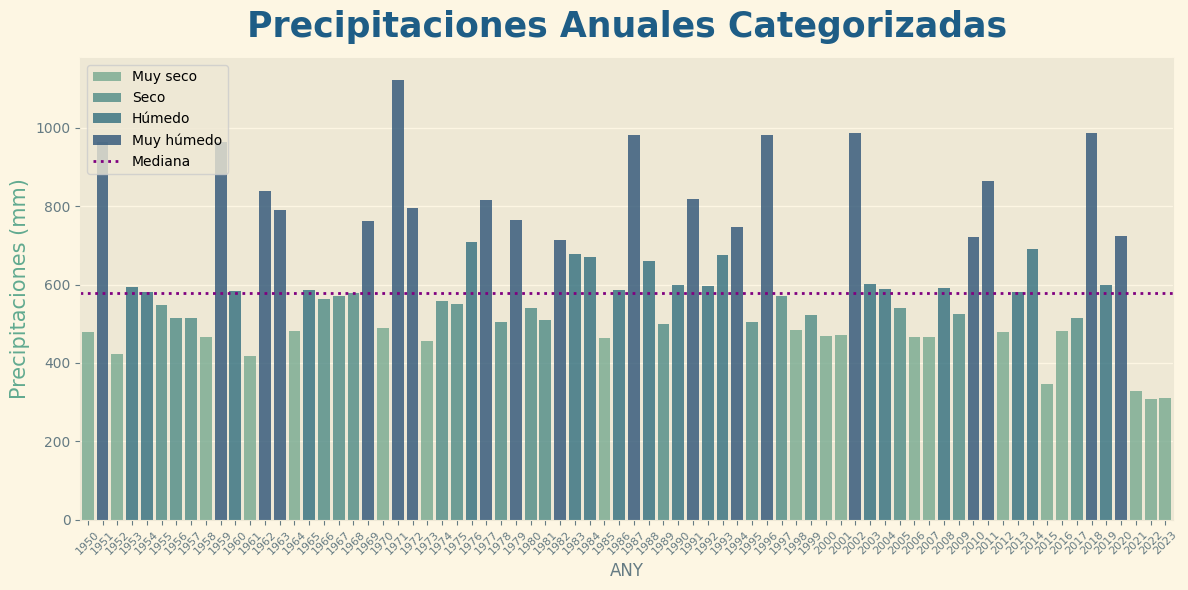

In [572]:
plt.style.use('Solarize_Light2')
fig, ax1 = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("crest", n_colors=3)
orden_categorias = ['Muy seco', 'Seco', 'Húmedo', 'Muy húmedo'] 
# Grafico las precipitaciones anuales
sns.barplot(data=prec_anual_BCN,
    x='ANY',
    y='PPT_anual',
    hue='categ_humedad', 
    hue_order=orden_categorias,
    palette="crest",
    ax=ax1,
    alpha=0.8)
ax1.set_title('Precipitaciones Anuales Categorizadas', fontsize=25, color=colors[2], pad=15, fontweight='bold')
ax1.set_ylabel('Precipitaciones (mm)', color=colors[0], fontsize=15)
ax1.axhline(y=prec_median, color="purple", linestyle=":", linewidth=2, label="Mediana")

plt.xticks(rotation=45, fontsize= 8)

ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 1.3 ¿ Qué pasa si eliminamos los últimos tres años más secos? 


In [573]:
prec_anual_BCN_hasta_2020= prec_anual_BCN['ANY'] <=2020
prec_anual_BCN_hasta_2020 = prec_anual_BCN[prec_anual_BCN_hasta_2020]
prec_anual_BCN_hasta_2020

,ANY,PPT_anual,categ_humedad
0,1971,1122.7,Muy húmedo
1,2018,988.0,Muy húmedo
2,2002,985.7,Muy húmedo
3,1996,982.4,Muy húmedo
4,1987,982.3,Muy húmedo
...,...,...,...
66,1985,463.9,Muy seco
67,1973,456.6,Muy seco
68,1952,421.8,Muy seco
69,1961,417.1,Muy seco


In [574]:
from scipy.stats import linregress
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(prec_anual_BCN_hasta_2020['ANY'], prec_anual_BCN_hasta_2020['PPT_anual'])

# Mostrar los resultados
print(f'Tendencia anual: {slope2:.2f} mm/año')
print(f'Intercepto: {intercept2:.2f}')
print(f'Coeficiente de correlación: {r_value2:.2f}')
print(f'Valor p: {p_value2:.3f}')
print(f'Error estándar: {std_err2:.2f}')

# Determinar si la tendencia es significativa
if p_value2 < 0.05:
    print("La tendencia es estadísticamente significativa.")
else:
    print("La tendencia NO es estadísticamente significativa.")



Tendencia anual: -0.11 mm/año
Intercepto: 836.17
Coeficiente de correlación: -0.01
Valor p: 0.914
Error estándar: 0.98
La tendencia NO es estadísticamente significativa.


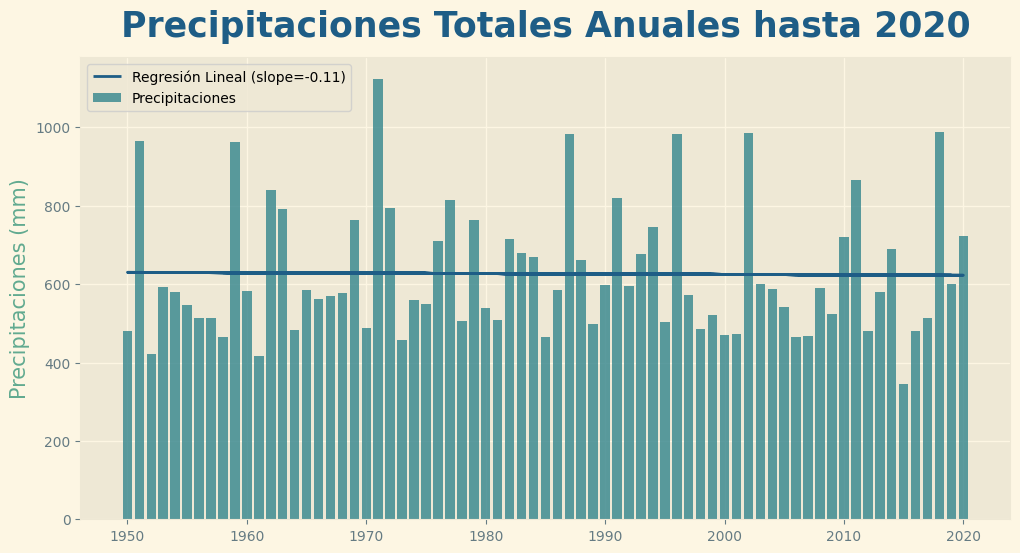

In [575]:
plt.style.use('Solarize_Light2')
fig, ax1 = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("crest", n_colors=3)

# Grafico las precipitaciones anuales
ax1.bar(prec_anual_BCN_hasta_2020['ANY'] , prec_anual_BCN_hasta_2020['PPT_anual'] ,
        color=colors[1], 
        alpha=0.8, 
        label='Precipitaciones')
ax1.set_title('Precipitaciones Totales Anuales hasta 2020', fontsize=25, color=colors[2], pad=15, fontweight='bold')
ax1.set_ylabel('Precipitaciones (mm)', color=colors[0], fontsize=15)

# grafico la línea de regresión o de tendencia con los valores obtenidos con la función linregres()
ax1.plot(prec_anual_BCN_hasta_2020['ANY'], 
         slope2 * prec_anual_BCN_hasta_2020['ANY'] + intercept2, 
         color=colors[2], 
         label=f'Regresión Lineal (slope={slope2:.2f})')
ax1.legend(loc='upper left')
plt.show()


# 2. Frecuencia y Magnitud de Episodios de Lluvia Fuerte
### ¿Se observa un aumento en la intensidad de los episodios de lluvia, con precipitaciones más fuertes concentradas en eventos puntuales?
Pienso que si visualizo un boxplot de las precipitaciones diarias para cada año, los outliers los puedo considerar como episodios de lluvias intensas. Decido hacerlo solo de los últimos 30 años porque si no, no se visualiza bien. Y también he considerado los días de lluvia de más de 1mm, porque si consideraba todos no conseguía ver los boxplot. 


In [608]:
# Decido visualizar los outliers de los últimos 30 años que corresponderían con los episodios de lluvias intensas,
# filtro mis datos a los últimos 30 años
P_T_diarias_BCN_ultimos_30 = P_T_diarias_BCN['ANY'] > 1993
P_T_diarias_BCN_ultimos_30 = P_T_diarias_BCN[P_T_diarias_BCN_ultimos_30]
# para poder visualizar mejor las boxplot, decido filtrar los días que han caídos lluvias de igual o más a 1mm
dias_lluvia_ultimos_30 = P_T_diarias_BCN_ultimos_30['PPT'] >= 1
dias_lluvia_ultimos_30 = P_T_diarias_BCN_ultimos_30[dias_lluvia_ultimos_30]

dias_lluvia_ultimos_30['PPT'].describe()
dias_lluvia_ultimos_30.head()



,ANY,MES,DIA,PPT,TX,TN,INS,fecha,lluvia_fuerte,Categoria
16076,1994,1,6,9.1,11.0,4.3,0.2,1994-01-06,False,Débil
16087,1994,1,17,6.2,7.6,1.5,6.0,1994-01-17,False,Débil
16104,1994,2,3,18.1,13.2,7.7,0.8,1994-02-03,True,Fuerte
16108,1994,2,7,1.6,12.5,3.5,10.3,1994-02-07,False,Débil
16113,1994,2,12,6.0,11.9,5.1,2.2,1994-02-12,False,Débil


### 2.1 Relación de precipitación anual con episodios de lluvias intensas (outliers) 
Gráfico los boxplot junto a un gráfico de lluvias totales anuales para ver también si hay alguna relación entre muchos días de lluvias intensos y años más lluviosos o menos. Pero no se ve ninguna relación y tampoco una evolución en el tiempo. 

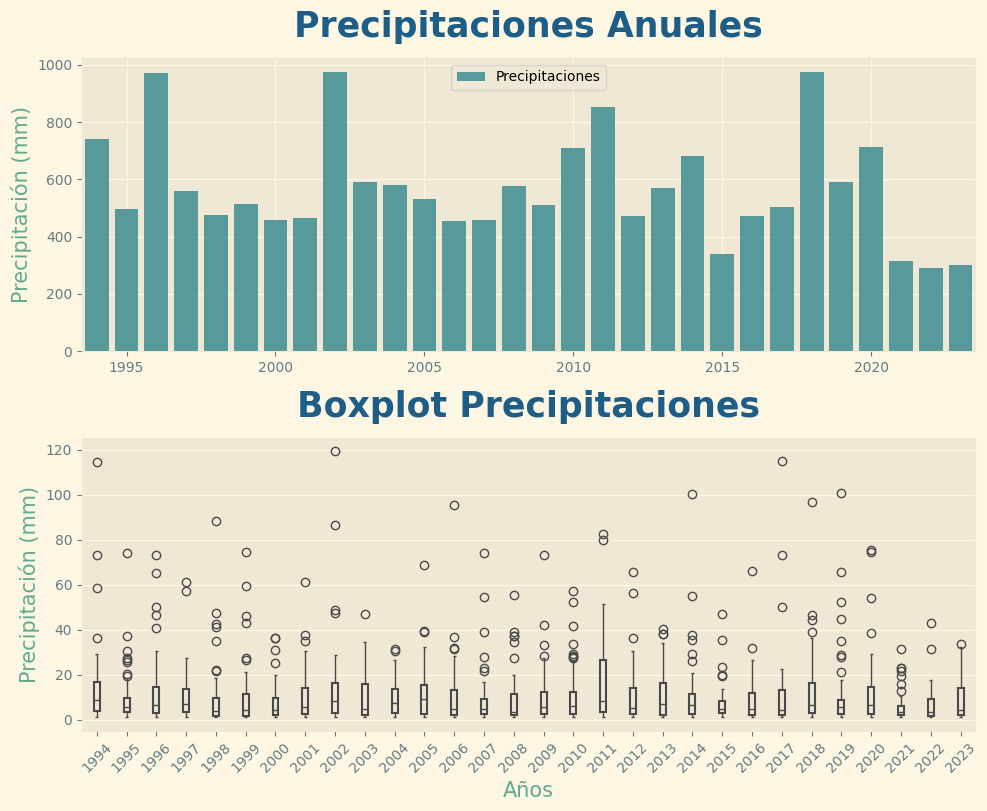

In [577]:
plt.style.use('Solarize_Light2')
# Establezco el cuadro y los ejes del gráfico
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 8))
colors = sns.color_palette("crest", n_colors=3)
ax1 = axs[0]
ax2 = axs[1]

prec_anual_BCN_ultimos_30 = dias_lluvia_ultimos_30.groupby('ANY')['PPT'].sum().sort_values(ascending=False).reset_index()
# Gráfico de barras
ax1.bar(prec_anual_BCN_ultimos_30['ANY'], prec_anual_BCN_ultimos_30['PPT'], 
        color=colors[1], 
        alpha=0.8, 
        label='Precipitaciones')
ax1.set_title('Precipitaciones Anuales', fontsize= 25,color=colors[2], pad=15, fontweight='bold')
ax1.set_ylabel('Precipitación (mm)', color=colors[0], fontsize=15)
ax1.set_xlim(min(dias_lluvia_ultimos_30['ANY'])-0.5, max(dias_lluvia_ultimos_30['ANY'])+0.5)
ax1.legend()

# Diagrama de caja
sns.boxplot(x=dias_lluvia_ultimos_30['ANY'], y=dias_lluvia_ultimos_30['PPT'], 
            width=0.2,
            boxprops={'facecolor': 'None', 'linewidth': 1.5})
ax2.set_title('Boxplot Precipitaciones', fontsize= 25,color=colors[2], pad=15, fontweight='bold')
ax2.set_ylabel('Precipitación (mm)', color=colors[0], fontsize=15)
ax2.set_xlabel('Años',color=colors[0], fontsize=15)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [578]:
colors

[(0.37890483, 0.66859548, 0.56566462),
 (0.20094292, 0.52087429, 0.55342884),
 (0.11646936, 0.36578429, 0.52726234)]

In [612]:
dias_lluvia_total = P_T_diarias_BCN['PPT'] >= 1
dias_lluvia_total = P_T_diarias_BCN[dias_lluvia_total]
dias_lluvia_total['PPT'].describe()

count    4349.000000
mean       10.280547
std        13.502939
min         1.000000
25%         2.300000
50%         5.400000
75%        12.800000
max       194.800000
Name: PPT, dtype: float64

### 2.2. Evolución de los días de lluvias fuertes. 
Para investigar un poco más si han aumentado los eventos lluviosos voy a observar la tendencia de los días de lluvias fuertes y también calcular el número de días de lluvia cada año.

In [579]:
# Hago una nueva columna con la categoría 'LLuvia fuerte', la defino como aquellos días que ha llovido 
# más que el tercer cuartil(75%) de la serie de lluvias sin considerar las menores a 1 mm
P_T_diarias_BCN['lluvia_fuerte'] = P_T_diarias_BCN['PPT'] > 13
# calculo la cantidad de días lluviosos 
def contar_dias_lluviosos(serie):
    # Cuenta los días con precipitación mayor a 0
    return (serie > 0).sum()

dias_lluviosos = P_T_diarias_BCN.groupby('ANY')['PPT'].apply(contar_dias_lluviosos)

dias_fuerte_lluvia = P_T_diarias_BCN.groupby('ANY')['lluvia_fuerte'].sum()


In [600]:
# creo un nuevo dataframe para cada año, con la precipitación total, los días de lluvia y los días de
analisis_lluvias = pd.DataFrame({
    'ANY': prec_anual_BCN['ANY'],
    'PPT': prec_anual_BCN['PPT_anual'],
    'Días lluviosos': dias_lluviosos.values,
    'Días lluvia fuerte': dias_fuerte_lluvia.values
})
analisis_lluvias = analisis_lluvias.sort_values(by='ANY')
analisis_lluvias

,ANY,PPT,Días lluviosos,Días lluvia fuerte
0,1950,479.7,66,14
1,1951,964.7,110,22
2,1952,421.8,66,10
3,1953,593.1,70,12
4,1954,579.9,83,17
...,...,...,...,...
69,2019,599.8,73,9
70,2020,723.1,84,20
71,2021,327.2,88,6
72,2022,307.7,80,5


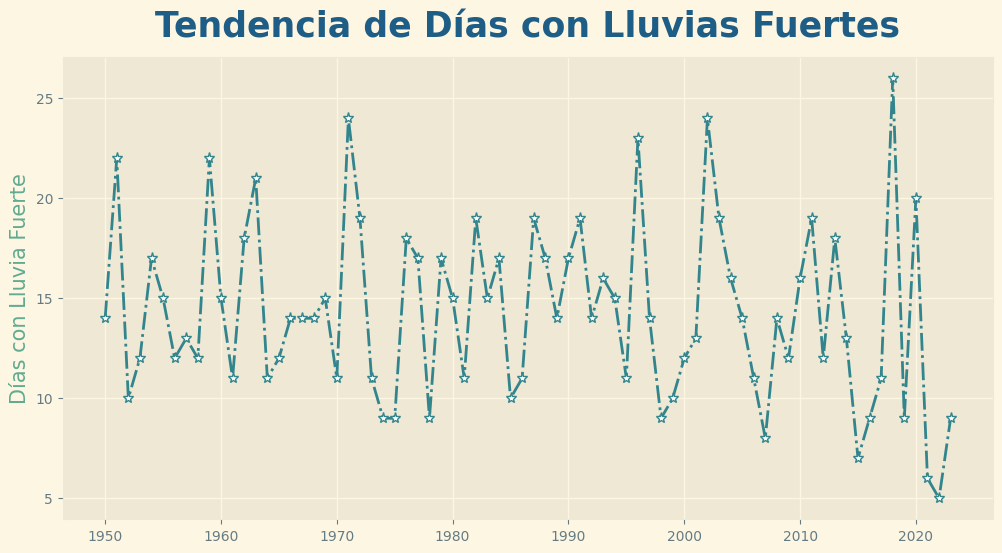

In [601]:
# gráfico de evolución del número de días de lluvias fuertes por año
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("crest", n_colors=3)
plt.plot(analisis_lluvias['ANY'], analisis_lluvias['Días lluvia fuerte'],
             '*-.', color= colors[1], markersize=8, linewidth=2, markerfacecolor='white')
plt.title('Tendencia de Días con Lluvias Fuertes',fontsize= 25,color=colors[2], pad=15, fontweight='bold')
plt.ylabel('Días con Lluvia Fuerte',fontsize=15, color=colors[0])
plt.show()




No sé ve ninguna tendencia a disminuir o aumentar, de todas formas lo compruebo con el cálculo de la linregress, y me confirma que no hay una tendencia estadisticamente significativa. 

In [602]:
from scipy.stats import linregress
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(analisis_lluvias['ANY'],
                                                              analisis_lluvias['Días lluvia fuerte'])

# Mostrar los resultados
print(f'Tendencia: {slope3:.2f}')
print(f'Intercepto: {intercept3:.2f}')
print(f'Coeficiente de correlación: {r_value3:.2f}')
print(f'Valor p: {p_value3:.10f}')
print(f'Error estándar: {std_err3:.2f}')

# Determinar si la tendencia es significativa
if p_value3 < 0.05:
    print("La tendencia es estadísticamente significativa.")
else:
    print("La tendencia NO es estadísticamente significativa.")



Tendencia: -0.03
Intercepto: 77.21
Coeficiente de correlación: -0.15
Valor p: 0.1961789486
Error estándar: 0.02
La tendencia NO es estadísticamente significativa.


### 2.3 Relación entre Precipitación total anual vs. días lluviosos / días lluvias fuertes 
Para identificar si la cantidad total de lluvia se distribuye en menos días:

#### Correlación Tau de Kendall
Antes de hacer la visualización de los  datos voy a evaluar la correlación entre ellos. Como ya he mencionadao anteriormente la variable **precipitación** no sigue una distribución normal por lo tanto, no se puede calcular en este caso el coeficiente de Pearson. Así que en este caso voy a usar la **Correlación Tau de Kendall "T"** que es una medida no paramétrica para evaluar la fuerza y la dirección de la asociación entre dos variable cuando estamos ante muestras pequeñas y que violan los supuestos del coef. de correlación de Pearson. 

In [615]:
# calculo de la correlación Tau de Kendall
import scipy.stats as stats
tau, p_value= stats.kendalltau( 
                               analisis_lluvias['PPT'], 
                               analisis_lluvias['Días lluvia fuerte'])
print(f'tau value: {tau:.2f}, p_value es: {p_value:.2g}')

tau value: 0.69, p_value es: 3.2e-17


Correlación moderada:
- Tau value: **0.42** indica una correlación positiva moderada entre las variables. Esto significa que, a medida que una variable aumenta, la otra tiende a disminuir de manera consistente, aunque no es una relación perfecta.

Significancia estadística: Esta relación no es un efecto aleatorio; está respaldada por los datos.
- p-value = **1.3e-07** el valor de p-value es muy pequeño indica que la probabilidad de que esta correlación positiva sea producto del azar es extremadamente baja. Esto sugiere que la relación es estadísticamente significativa.


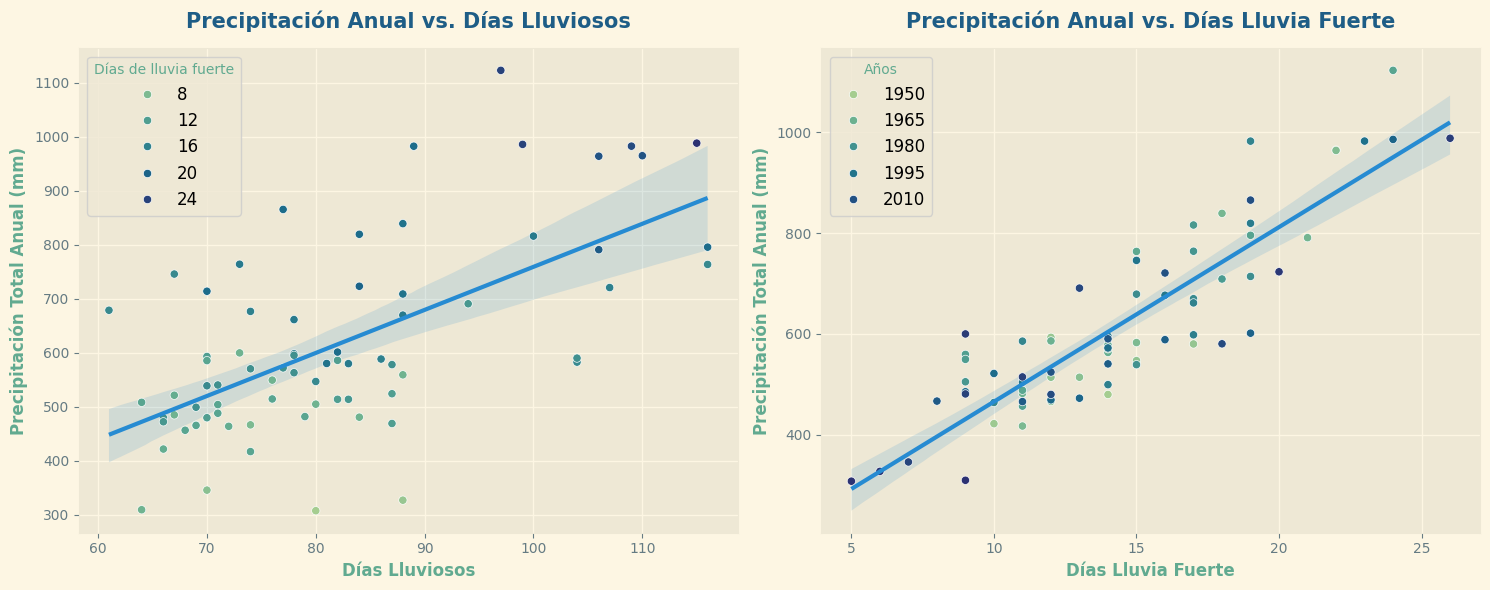

In [605]:
plt.style.use('Solarize_Light2')  

# Establezco el cuadro y los ejes del gráfico
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))  # Tamaño ajustado para gráficos lado a lado
colors = sns.color_palette("crest", n_colors=3)
ax1 = axs[0]
ax2 = axs[1]

# Primer gráfico
sns.regplot(data= analisis_lluvias, 
            x= 'Días lluviosos',
            y= 'PPT',
            scatter_kws= {'s': 10}, # ajusto el tamaño de los puntos de dispersión
            ax=ax1) 
sns.scatterplot(
    data=analisis_lluvias, 
    x='Días lluviosos', 
    y='PPT', 
    hue='Días lluvia fuerte', 
    palette='crest',
    ax=ax1
)
ax1.set_title('Precipitación Anual vs. Días Lluviosos',fontsize= 15,color=colors[2], pad=15, fontweight='bold')
ax1.set_xlabel('Días Lluviosos',color=colors[0], fontweight='bold')
ax1.set_ylabel('Precipitación Total Anual (mm)', color=colors[0], fontweight='bold')
legend1= ax1.legend(title="Días de lluvia fuerte", fontsize=12)
plt.setp(legend1.get_title(), color=colors[0])

# Segundo gráfico
sns.regplot(data= analisis_lluvias, 
            x= 'Días lluvia fuerte',
            y= 'PPT',
            scatter_kws= {'s': 10}, # ajusto el tamaño de los puntos de dispersión
            ax=ax2) 
sns.scatterplot(
    data=analisis_lluvias, 
    x='Días lluvia fuerte', 
    y='PPT', 
    hue='ANY', 
    palette='crest',
    ax=ax2
)
ax2.set_title('Precipitación Anual vs. Días Lluvia Fuerte', fontsize= 15,color=colors[2], pad=15, fontweight='bold')
ax2.set_xlabel('Días Lluvia Fuerte',color=colors[0], fontweight='bold')
ax2.set_ylabel('Precipitación Total Anual (mm)', color=colors[0], fontweight='bold')
legend= ax2.legend(title="Años", fontsize=12)
plt.setp(legend.get_title(), color=colors[0])

plt.tight_layout()  # Ajusto para que no solaparse
plt.show()


#### 3. proporción de diferentes tipos de eventos que conforman el total de lluvias.
Para saber la cantidad de lluvia que cada año pertenece a eventos de lluvia débiles, fuertes o extremos, hago una categorización de los días de lluvia. Sumo la lluvia para cada una de las categorías y calculo el porcentaje en función del total de precipitación de ese año. 

In [585]:
# Defino los umbrales para las categorías
def clasificar_lluvia(ppt):
    if ppt > 50:
        return 'Extrema'
    elif ppt > 13:
        return 'Fuerte'
    elif ppt > 0:
        return 'Débil'
    else:
        return 'Sin lluvia'

# Creo una nueva columna para clasificar la lluvia
P_T_diarias_BCN['Categoria'] = P_T_diarias_BCN['PPT'].apply(clasificar_lluvia)

# Calculo la suma de lluvia por categoría y año
lluvia_por_categoria = (P_T_diarias_BCN.groupby(['ANY', 'Categoria'])['PPT'].sum().reset_index(name='Suma_PPT'))

# Calculo el total de lluvia por año
lluvia_total_por_ano = (P_T_diarias_BCN.groupby('ANY')['PPT'].sum().reset_index(name='Total_PPT'))

# Combino los datos de lluvia por categoría y totales por año
resultados = pd.merge(lluvia_por_categoria, lluvia_total_por_ano, on='ANY')

# Calculo el porcentaje
resultados['Porcentaje'] = (resultados['Suma_PPT'] / resultados['Total_PPT']) * 100

print(resultados)



      ANY   Categoria  Suma_PPT  Total_PPT  Porcentaje
0    1950       Débil     181.2      479.7   37.773609
1    1950     Extrema      56.2      479.7   11.715656
2    1950      Fuerte     242.3      479.7   50.510736
3    1950  Sin lluvia       0.0      479.7    0.000000
4    1951       Débil     286.5      964.7   29.698352
..    ...         ...       ...        ...         ...
272  2022      Fuerte     121.1      307.7   39.356516
273  2022  Sin lluvia       0.0      307.7    0.000000
274  2023       Débil     104.3      309.5   33.699515
275  2023      Fuerte     205.2      309.5   66.300485
276  2023  Sin lluvia       0.0      309.5    0.000000

[277 rows x 5 columns]


In [586]:
# conseguir los datos de años, lluvia débil, fuerte y extrema en 4 series de numpy 
# para poder incluirlas en el gráfico y conseguir las barras apiladas.
any = resultados['ANY'].sort_values()
any = any.drop_duplicates()
any = any.reset_index(drop=True)
lluvia_debil = resultados['Categoria'] == 'Débil'
lluvia_debil = resultados[lluvia_debil].sort_values(['ANY'], ascending=True)
lluvia_debil = lluvia_debil['Suma_PPT']
lluvia_debil = lluvia_debil.reset_index(drop=True)
lluvia_fuerte = resultados['Categoria'] == 'Fuerte'
lluvia_fuerte = resultados[lluvia_fuerte].sort_values(['ANY'], ascending=True)
lluvia_fuerte = lluvia_fuerte['Suma_PPT']
lluvia_fuerte = lluvia_fuerte.reset_index(drop=True)
lluvia_extrema = resultados['Categoria'] == 'Extrema'
lluvia_extrema = resultados[lluvia_extrema].sort_values(['ANY'], ascending=True)
lluvia_extrema2= pd.merge(any, lluvia_extrema, on='ANY', how='outer')
lluvia_extrema2['Suma_PPT']= lluvia_extrema2['Suma_PPT'].fillna(0.0)
lluvia_extrema2['Categoria']= lluvia_extrema2['Categoria'].fillna('Extrema')
lluvia_extrema2 = lluvia_extrema2['Suma_PPT']
lluvia_extrema2 = lluvia_extrema2.reset_index(drop=True)

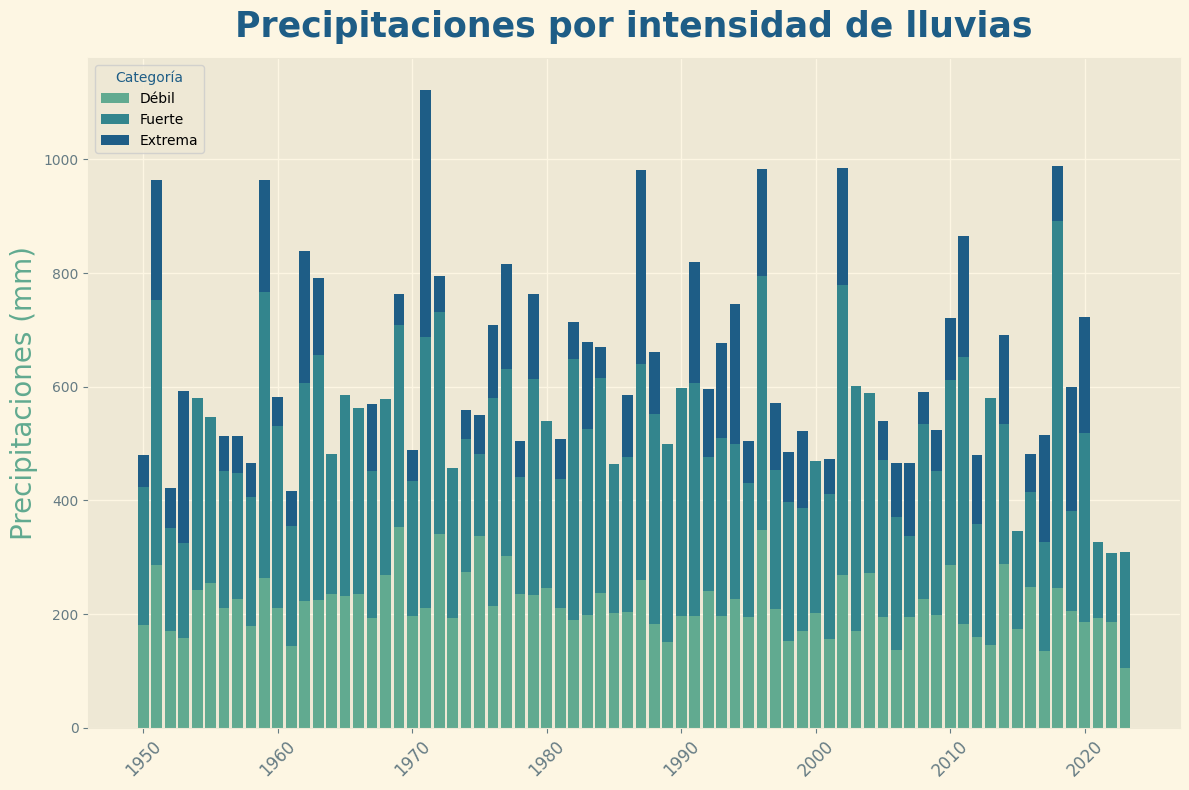

In [587]:
## Gráfico de barras apiladas

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette("crest", n_colors=3)

ax.bar(any, lluvia_debil, label='Débil', color= colors[0])
ax.bar(any, lluvia_fuerte, bottom = lluvia_debil, label='Fuerte',color= colors[1])
ax.bar(any, lluvia_extrema2, bottom = lluvia_debil + lluvia_fuerte, label='Extrema', color= colors[2])

ax.set_title('Precipitaciones por intensidad de lluvias', fontsize=25,color=colors[2], pad=15, fontweight='bold')
ax.set_ylabel('Precipitaciones (mm)', fontsize=20,color=colors[0])
legend= ax.legend(title='Categoría', loc='upper left')
plt.setp(legend.get_title(), color=colors[2])
plt.xticks( rotation=45, fontsize=12)
plt.tight_layout()

plt.show()

In [588]:
colors

[(0.37890483, 0.66859548, 0.56566462),
 (0.20094292, 0.52087429, 0.55342884),
 (0.11646936, 0.36578429, 0.52726234)]

# 3. Influencia de las temperatura en las precipitaciones anuales.
¿Existe alguna relación entre la precipitación y la temperatura?

In [589]:
prec_anual_BCN = P_T_diarias_BCN.groupby('ANY')['PPT'].sum().sort_values(ascending=False).reset_index()
prec_anual_BCN = prec_anual_BCN.rename(columns= {"PPT": "PPT_anual"} )
# añado columnas de Temperatura máxima y mínima a mi dataframe de precipitación anual
# para poder graficar precipit vs temperatura
prec_anual_BCN['TX_anual'] = P_T_diarias_BCN.groupby('ANY')['TX'].max().values
prec_anual_BCN['TN_anual'] = P_T_diarias_BCN.groupby('ANY')['TN'].min().values
prec_anual_BCN = prec_anual_BCN.sort_values(by='ANY').reset_index(drop=True)

prec_anual_BCN

,ANY,PPT_anual,TX_anual,TN_anual
0,1950,479.7,37.6,-2.8
1,1951,964.7,32.0,-0.9
2,1952,421.8,37.2,-2.4
3,1953,593.1,34.0,-1.1
4,1954,579.9,34.1,-4.3
...,...,...,...,...
69,2019,599.8,34.5,-1.7
70,2020,723.1,32.3,-0.4
71,2021,327.2,35.3,-0.5
72,2022,307.7,38.8,-1.1


In [590]:
# Calculo las medidas de estadística  descriptivas generales
temp_stats = round(prec_anual_BCN['TX_anual'].describe(), 2)

# Añado algunas medidas más: Mediana, Moda, Rango, Varianza
temp_median = round(prec_anual_BCN['TX_anual'].median(), 2)
temp_range = np.ptp(prec_anual_BCN['TX_anual'])
temp_mode = prec_anual_BCN['TX_anual'].mode()[0] 
temp_varianza = round(np.var(prec_anual_BCN['TX_anual'], ddof=1), 2)
temp_mean = prec_anual_BCN['TX_anual'].mean()  

# añado las nuevas medidas a la lista de estadística descriptiva
temp_stats['median'] = temp_median
temp_stats['mode'] = temp_mode 
temp_stats['range'] = temp_range
temp_stats['varianza'] = temp_varianza

temp_stats

count       74.00
mean        33.91
std          1.99
min         30.60
25%         32.50
50%         33.70
75%         35.08
max         39.10
median      33.70
mode        32.60
range        8.50
varianza     3.98
Name: TX_anual, dtype: float64

In [591]:
from scipy.stats import shapiro
# compruebo si la distribución  de la TEMPERATURA es normal haciendo el Shapiro TEST
# stat es el valor para evaluar la normalidad de la muestra
stat, p_value = shapiro(prec_anual_BCN['TX_anual'])
if p_value > 0.05:
    print(f"La distribución es aproximadamente normal: p_value = {p_value:2f}")
else:
    print(f"La distribución no es normal: p_value = {p_value:2f}")

La distribución no es normal: p_value = 0.003964


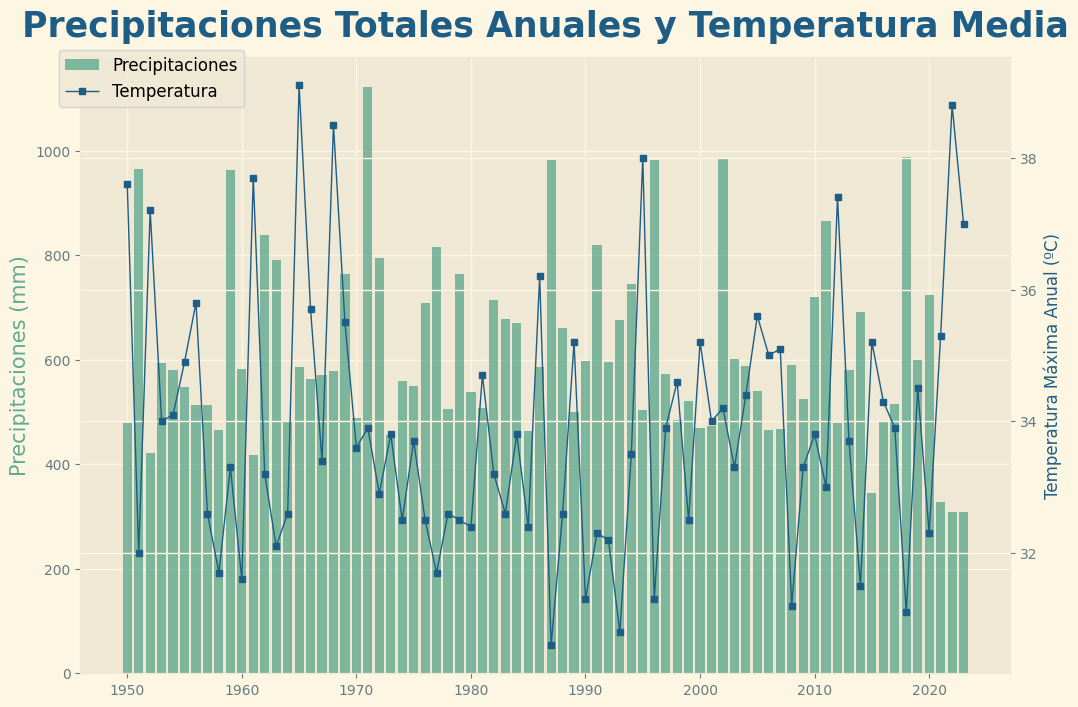

In [592]:
plt.style.use('Solarize_Light2')
fig, ax1 = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("crest", n_colors=3)

# Grafico las precipitaciones anuales
ax1.bar(prec_anual_BCN['ANY'] , prec_anual_BCN['PPT_anual'] ,
        color=colors[0], 
        alpha=0.8, 
        label='Precipitaciones')
ax1.set_title('Precipitaciones Totales Anuales y Temperatura Media', fontsize=25, color=colors[2], pad=15, fontweight='bold')
ax1.set_ylabel('Precipitaciones (mm)', color=colors[0], fontsize= 15)

# Creo un segundo eje que comparte el eje x con el primero
ax2 = ax1.twinx()

# Grafico las temperaturas máximas anuales
ax2.plot(prec_anual_BCN['ANY'] , prec_anual_BCN['TX_anual'] ,
         color=colors[2], 
         marker='s',
         markersize= 5, 
         linewidth=1, 
         label='Temperatura')
ax2.set_ylabel('Temperatura Máxima Anual (ºC)', color=colors[2])

# agrego una leyenda combinada
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

plt.show()

In [616]:
import scipy.stats as stats
# calculo de la correlación Tau de Kendall
tau, p_value= stats.kendalltau(prec_anual_BCN['TX_anual'], prec_anual_BCN['PPT_anual'])
print(f'tau value: {tau:.2f}, p_value es: {p_value:.2g}')

tau value: -0.38, p_value es: 2.2e-06


Correlación negativa moderada:
- Tau value: -0.38 indica una correlación negativa moderada entre las variables. Esto significa que, a medida que una variable aumenta, la otra tiende a disminuir de manera consistente, aunque no es una relación perfecta.

Significancia estadística: Esta relación no es un efecto aleatorio; está respaldada por los datos.
- p-value = 2.2e-06 el valor de p-value es muy pequeño indica que la probabilidad de que esta correlación negativa sea producto del azar es extremadamente baja. Esto sugiere que la relación es estadísticamente significativa.




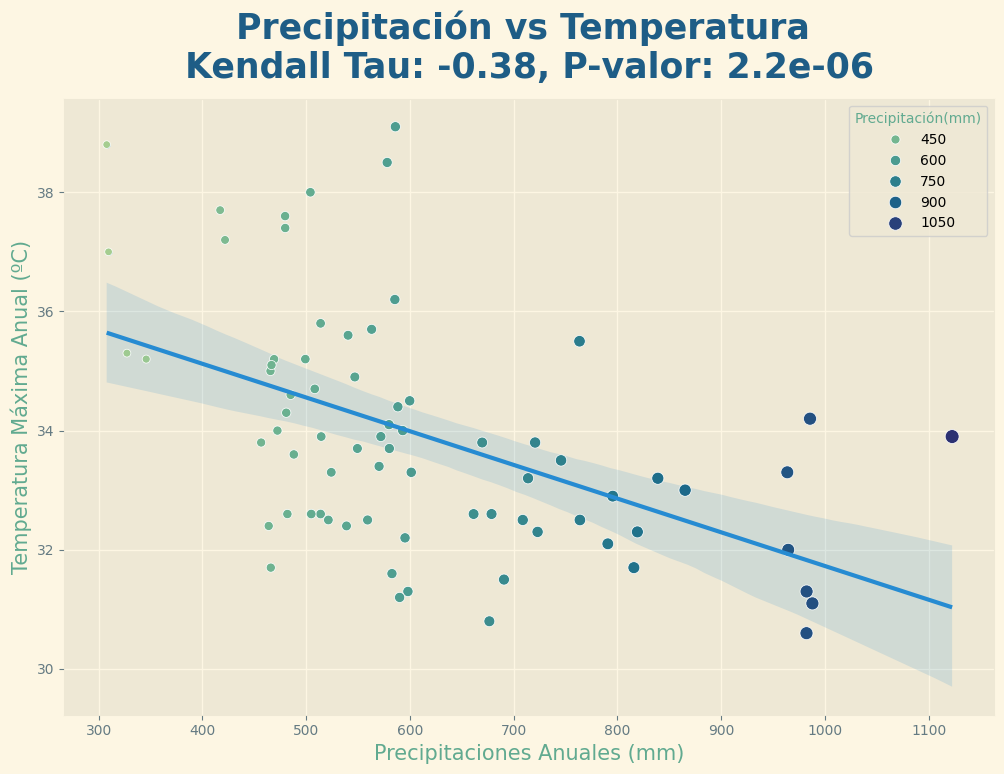

In [594]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette("crest", n_colors=3)
# Relación precipitación - temperatura máxima
ax = sns.regplot(data= prec_anual_BCN, 
            x= 'PPT_anual',
            y= 'TX_anual',
            scatter_kws= {'s': 10}, # ajusto el tamaño de los puntos de dispersión
            ax=ax) 
g = sns.scatterplot(data= prec_anual_BCN, 
            x= 'PPT_anual',
            y= 'TX_anual',
            hue= 'PPT_anual',
            size= 'PPT_anual',
            sizes= (30,100),
            palette="crest"
            )


# asigno el título y nombre de los ejes
g.set_title(f'Precipitación vs Temperatura \nKendall Tau: {tau:.2f}, P-valor: {p_value:.2g}', fontsize= 25, color=colors[2], pad=15, fontweight='bold')
g.set_xlabel('Precipitaciones Anuales (mm)', fontsize= 15, color=colors[0])
g.set_ylabel('Temperatura Máxima Anual (ºC)', fontsize = 15, color=colors[0])
legend= g.legend(title= 'Precipitación(mm)', loc='upper right')
plt.setp(legend.get_title(), color=colors[0])

plt.show()
